In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import yellowbrick
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
set_palette('dark')
plt.rcParams['figure.dpi'] = 100

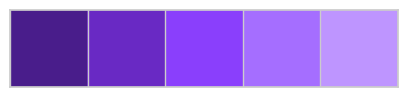

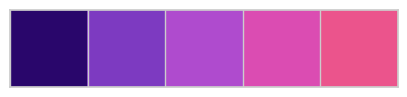

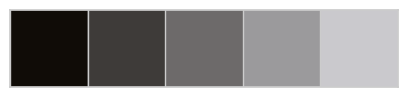

In [ ]:
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
color_mix = ['#29066B', '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [ ]:
dataset = pd.read_csv('Iris.csv')
dataset.head().style.background_gradient(cmap = 'Purples').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [ ]:
print('\033[35m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[35m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[35m\033[1m', dataset.shape[0])
print('\033[0m'+'Total Columns:'+'\033[35m\033[1m', dataset.shape[1])
print('\033[0m\033[35m*' * 20)
print('\n')
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[35m*' * 22 +'\033[0m')
dataset.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 150
Total Columns: 6
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)

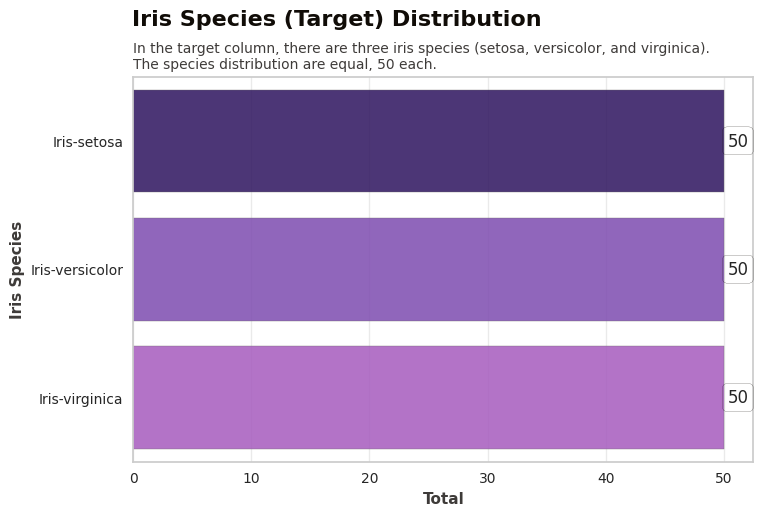

In [ ]:
colors = color_mix
order = dataset['Species'].value_counts().index
plt.figure(figsize = (8, 5))
ax = sns.countplot(y = 'Species', data = dataset, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+1.2, y+height/2, '{:.0f}'.format(width), horizontalalignment = 'center', verticalalignment = 'center',
             bbox = dict(facecolor = 'none', edgecolor = black_grad[0], linewidth = 0.15, boxstyle = 'round'))

plt.suptitle('Iris Species (Target) Distribution', fontweight = 'heavy',
             x = 0.124, y = 1.015, ha = 'left', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])
plt.title('In the target column, there are three iris species (setosa, versicolor, and virginica).\nThe species distribution are equal, 50 each.',
          fontsize = 10, fontfamily = 'sans-serif', loc = 'left', color = black_grad[1])
plt.xlabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Iris Species', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0.4);

In [ ]:
dataset.select_dtypes(include = 'float').describe().T.style.background_gradient(cmap = 'RdPu').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


.: Sepal Length Skewness & Kurtosis :.
****************************************
Skewness: 0.315
Kurtosis: -0.552




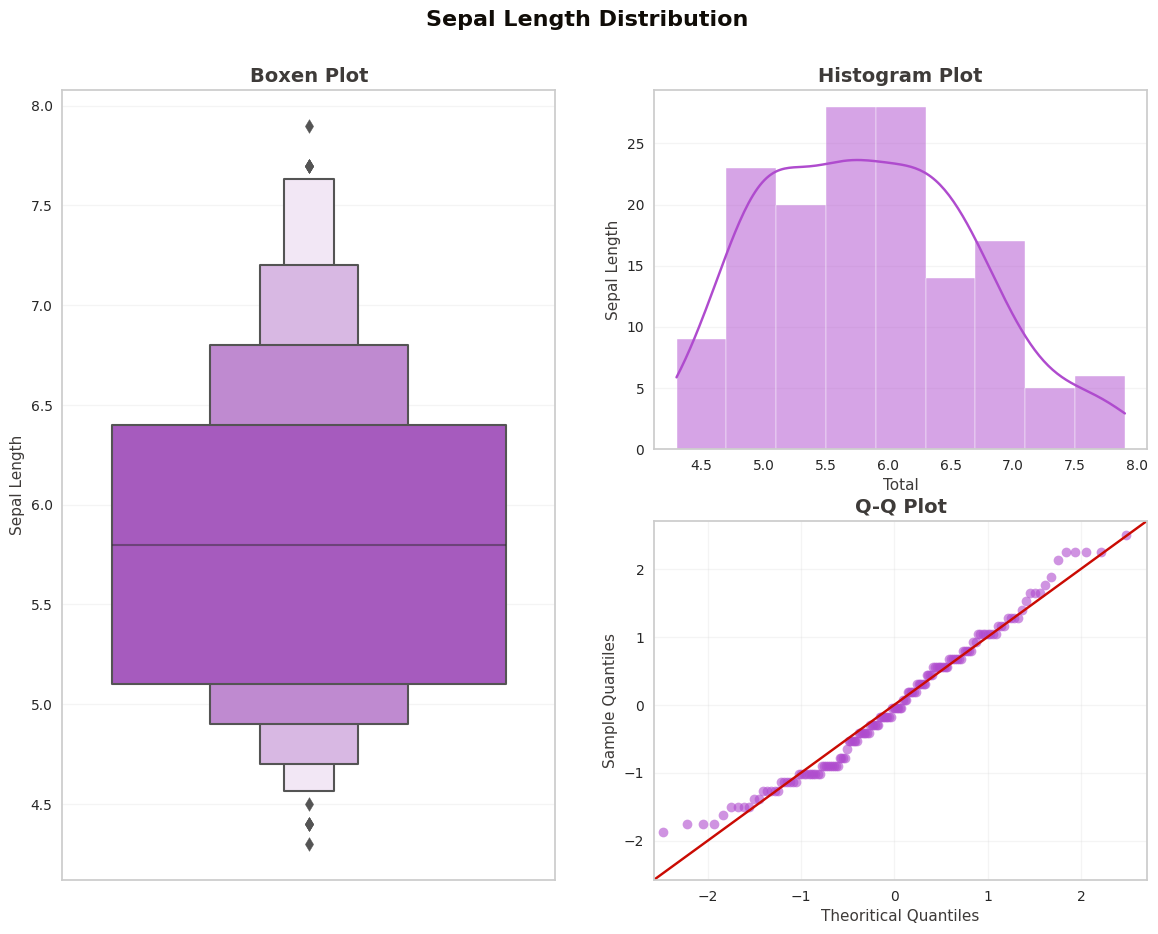

In [ ]:
var = dataset['SepalLengthCm']
color = color_mix[2]
fig = plt.figure(figsize = (14, 10))
print('\033[35m\033[1m'+'.: Sepal Length Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[35m\033[1m {:.3f}'.format(var.skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[35m\033[1m {:.3f}'.format(var.kurt(axis = 0, skipna = True)))
print('\n')
fig.suptitle('Sepal Length Distribution', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])
fig.subplots_adjust(top = 0.9)
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.histplot(data = dataset, x = var, kde = True, color = color)
plt.xlabel('Total', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Sepal Length', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0)
plt.grid(axis = 'y', alpha = 0.2)
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
qqplot(var, fit = True, line = '45', ax = ax_2, markerfacecolor = color, markeredgecolor = color, alpha = 0.6)
plt.xlabel('Theoritical Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.ylabel('Sample Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'both', alpha = 0.2)
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Boxen Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.boxenplot(y = var, data = dataset, color = color, linewidth = 1.5)
plt.ylabel('Sepal Length', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.2)

plt.show();

.: Sepal Width Skewness & Kurtosis :.
****************************************
Skewness: 0.334
Kurtosis: 0.291




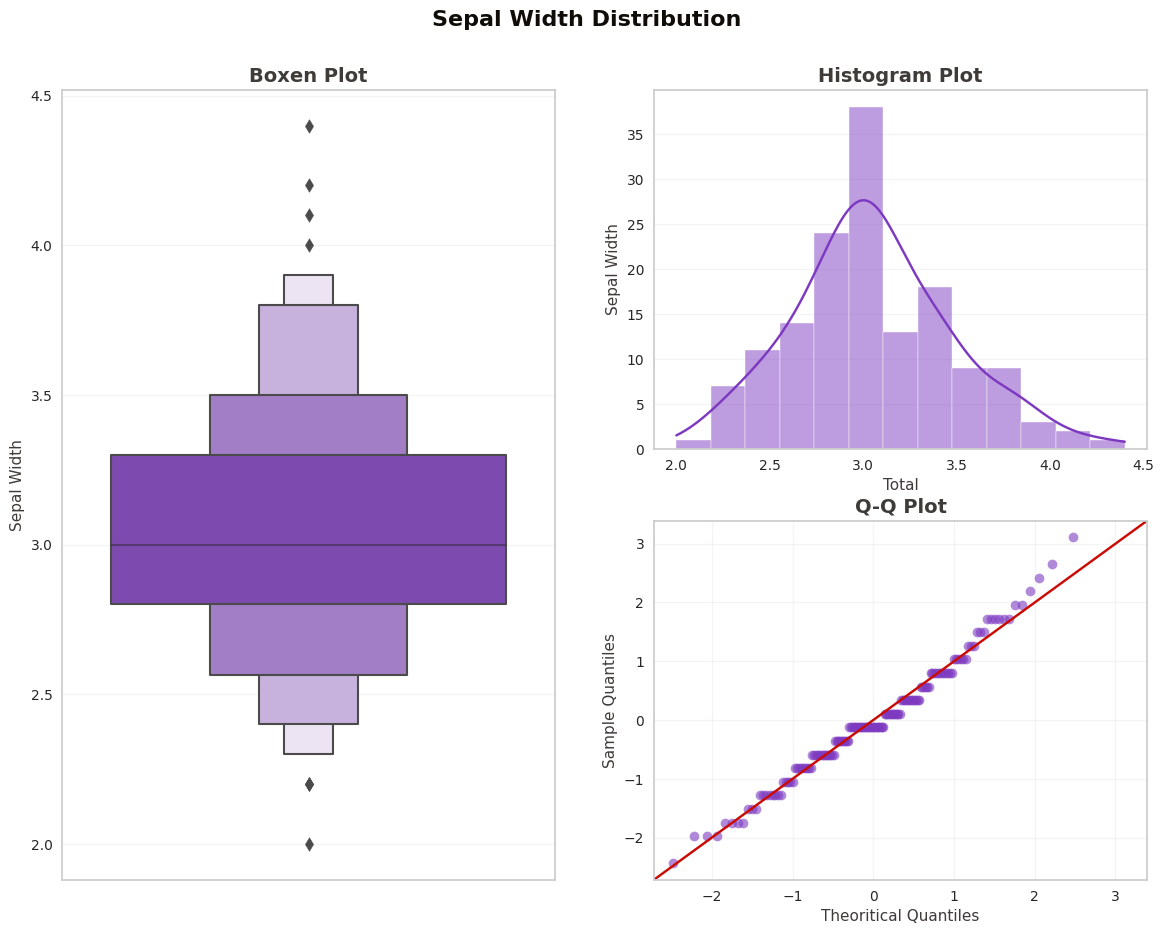

In [ ]:
var = dataset['SepalWidthCm']
color = color_mix[1]
fig = plt.figure(figsize = (14, 10))
print('\033[35m\033[1m'+'.: Sepal Width Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[35m\033[1m {:.3f}'.format(var.skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[35m\033[1m {:.3f}'.format(var.kurt(axis = 0, skipna = True)))
print('\n')
fig.suptitle('Sepal Width Distribution', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif', color = black_grad[0])
fig.subplots_adjust(top = 0.9)
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.histplot(data = dataset, x = var, kde = True, color = color)
plt.xlabel('Total', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Sepal Width', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0)
plt.grid(axis = 'y', alpha = 0.2)
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
qqplot(var, fit = True, line = '45', ax = ax_2, markerfacecolor = color, markeredgecolor = color, alpha = 0.6)
plt.xlabel('Theoritical Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Sample Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'both', alpha = 0.2)
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Boxen Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.boxenplot(y = var, data = dataset, color = color, linewidth = 1.5)
plt.ylabel('Sepal Width', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.2)

plt.show();

.: Petal Length Skewness & Kurtosis :.
****************************************
Skewness: -0.274
Kurtosis: -1.402




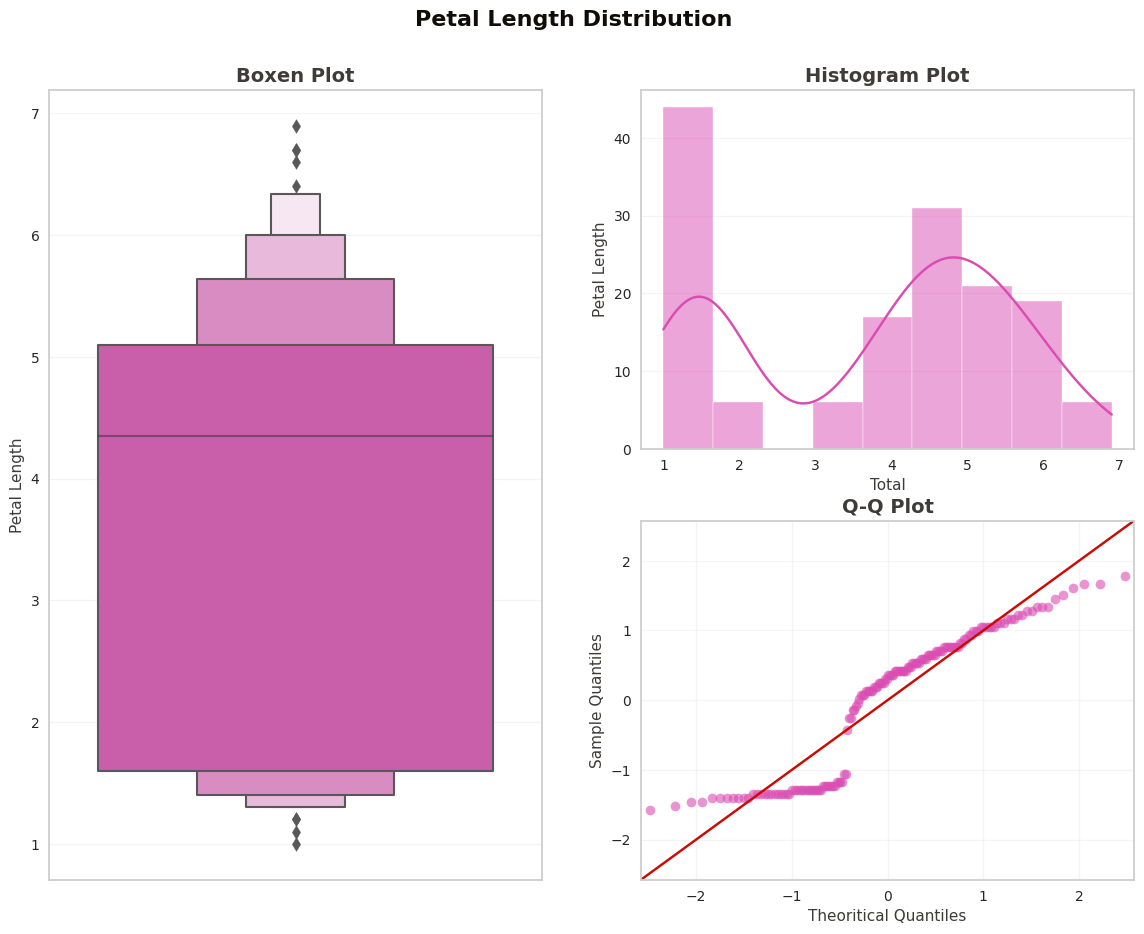

In [ ]:
var = dataset['PetalLengthCm']
color = color_mix[3]
fig = plt.figure(figsize = (14, 10))
print('\033[35m\033[1m'+'.: Petal Length Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[35m\033[1m {:.3f}'.format(var.skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[35m\033[1m {:.3f}'.format(var.kurt(axis = 0, skipna = True)))
print('\n')
fig.suptitle('Petal Length Distribution', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])
fig.subplots_adjust(top = 0.9)
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.histplot(data = dataset, x = var, kde = True, color = color)
plt.xlabel('Total', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Petal Length', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0)
plt.grid(axis = 'y', alpha = 0.2)
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
qqplot(var, fit = True, line = '45', ax = ax_2, markerfacecolor = color, markeredgecolor = color, alpha = 0.6)
plt.xlabel('Theoritical Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.ylabel('Sample Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'both', alpha = 0.2)
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Boxen Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.boxenplot(y = var, data = dataset, color = color, linewidth = 1.5)
plt.ylabel('Petal Length', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.2)

plt.show();

.: Petal Width Skewness & Kurtosis :.
****************************************
Skewness: -0.105
Kurtosis: -1.340




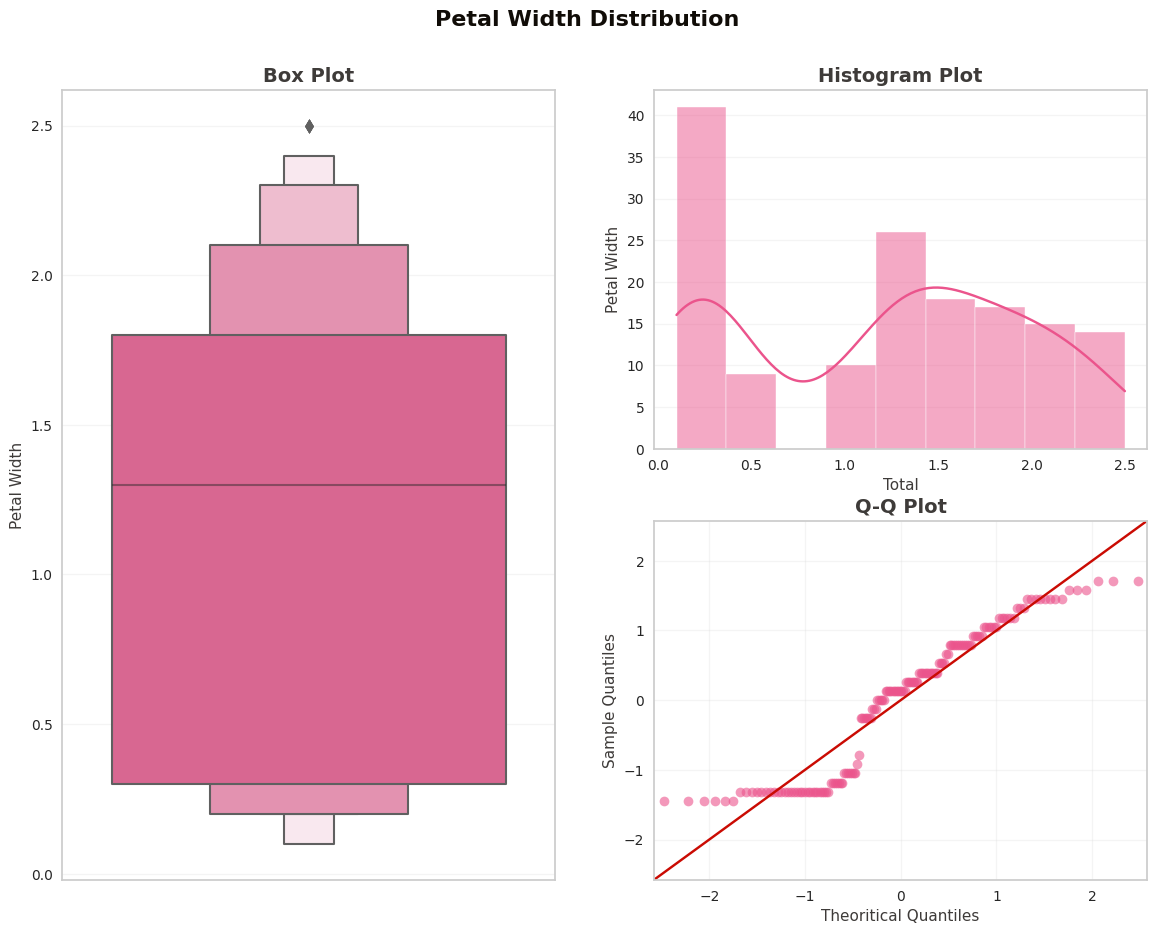

In [ ]:
var = dataset['PetalWidthCm']
color = color_mix[4]
fig = plt.figure(figsize = (14, 10))
print('\033[35m\033[1m'+'.: Petal Width Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[35m\033[1m {:.3f}'.format(var.skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[35m\033[1m {:.3f}'.format(var.kurt(axis = 0, skipna = True)))
print('\n')
fig.suptitle('Petal Width Distribution', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif', color = black_grad[0])
fig.subplots_adjust(top = 0.9)
ax_1 = fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.histplot(data = dataset, x = var, kde = True, color = color)
plt.xlabel('Total', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Petal Width', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0)
plt.grid(axis = 'y', alpha = 0.2)
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
qqplot(var, fit = True, line = '45', ax = ax_2, markerfacecolor = color, markeredgecolor = color, alpha = 0.6)
plt.xlabel('Theoritical Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Sample Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'both', alpha = 0.2)
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[1])
sns.boxenplot(y = var, data = dataset, color = color, linewidth = 1.5)
plt.ylabel('Petal Width', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.2)

plt.show();

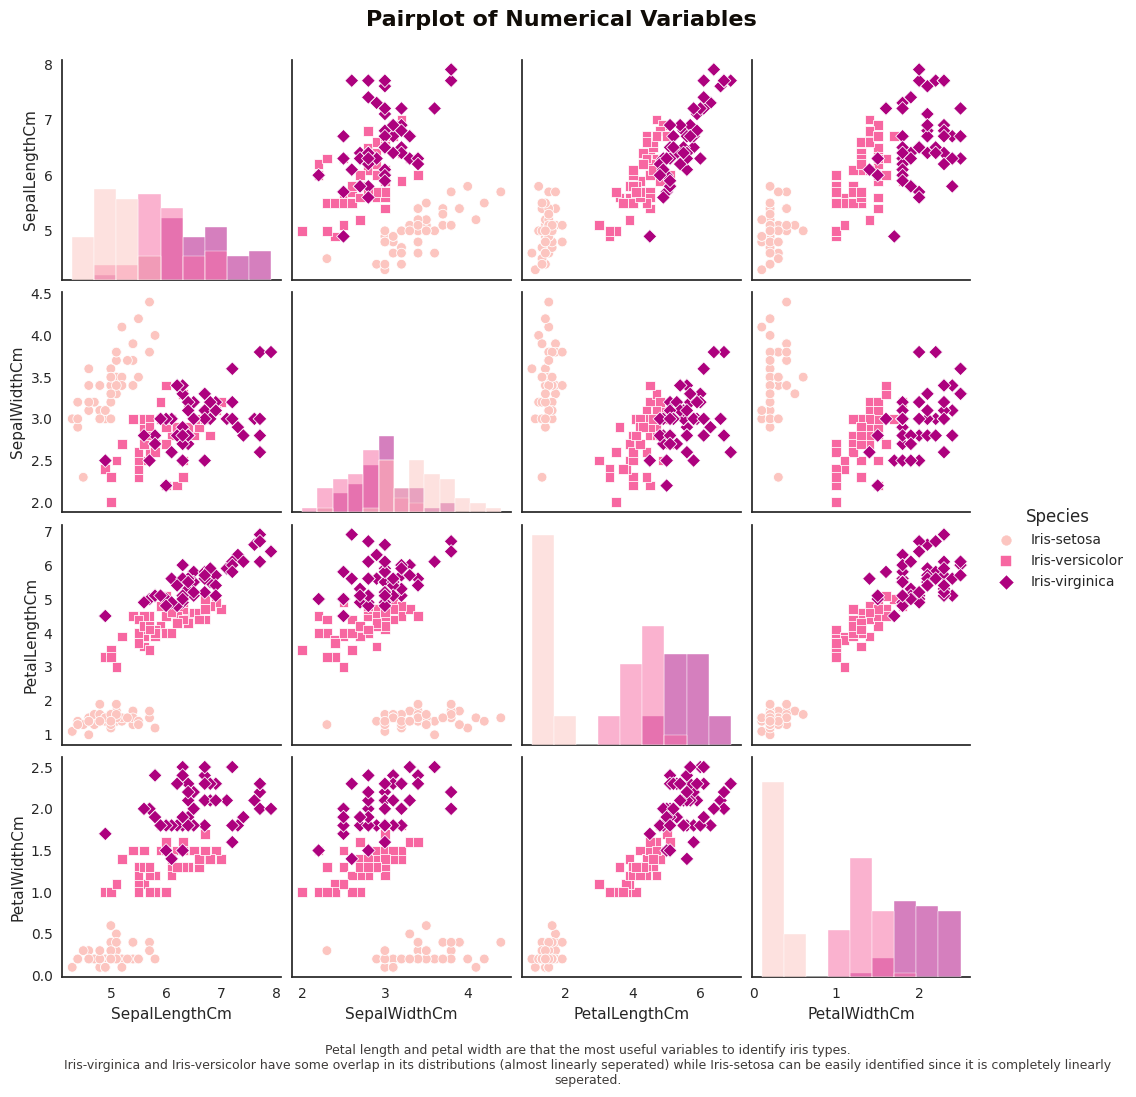

In [ ]:
sns.set_style('white')
vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
pairplot = sns.pairplot(dataset, hue = 'Species', diag_kind = 'hist', palette = 'RdPu', markers = ['o', 's', 'D'],
                        vars = vars)
pairplot.fig.suptitle('Pairplot of Numerical Variables', fontweight = 'heavy', y = 1.03, fontsize = '16',
                      fontfamily = 'sans-serif', color = black_grad[0])
plt.text(-2, -23, 'Petal length and petal width are that the most useful variables to identify iris types.\nIris-virginica and Iris-versicolor have some overlap in its distributions (almost linearly seperated) while Iris-setosa can be easily identified since it is completely linearly seperated.',
         fontsize = 9, ha = 'center', va = 'bottom', wrap = True, color = black_grad[1]);

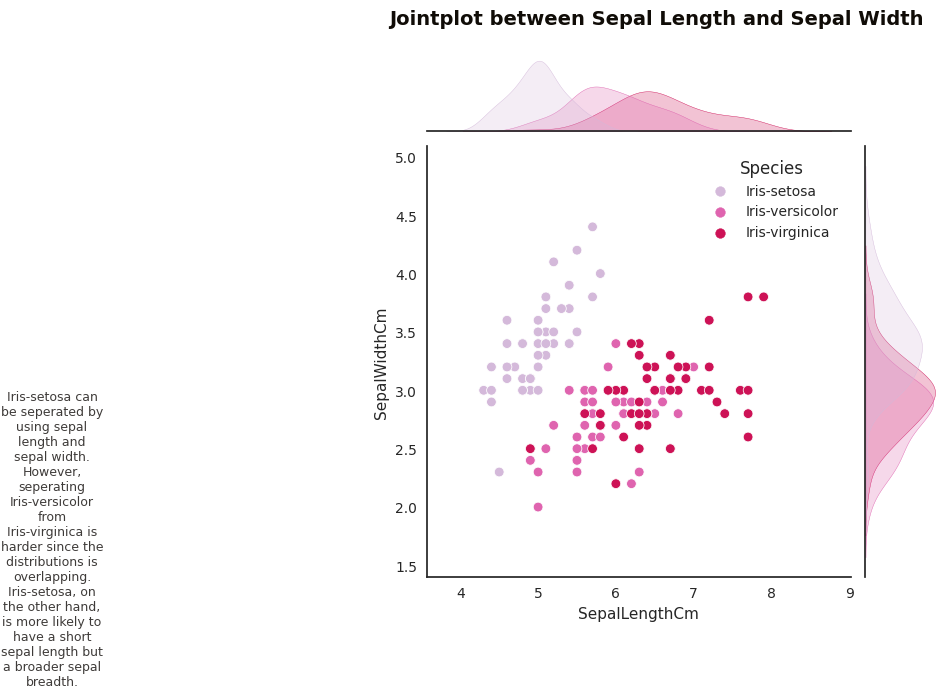

In [ ]:
jointplot = sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = dataset, hue = 'Species', palette = 'PuRd')
jointplot.fig.suptitle('Jointplot between Sepal Length and Sepal Width', fontweight = 'heavy', y = 1.05, fontsize = '14',
                       fontfamily = 'sans-serif', color = black_grad[0])
plt.text(-1.25, 0.45, 'Iris-setosa can be seperated by using sepal length and sepal width.\nHowever, seperating Iris-versicolor from Iris-virginica is harder since the distributions is overlapping.\nIris-setosa, on the other hand, is more likely to have a short sepal length but a broader sepal breadth.',
         fontsize = '9', ha = 'center', va = 'bottom', wrap = True, color = black_grad[1]);

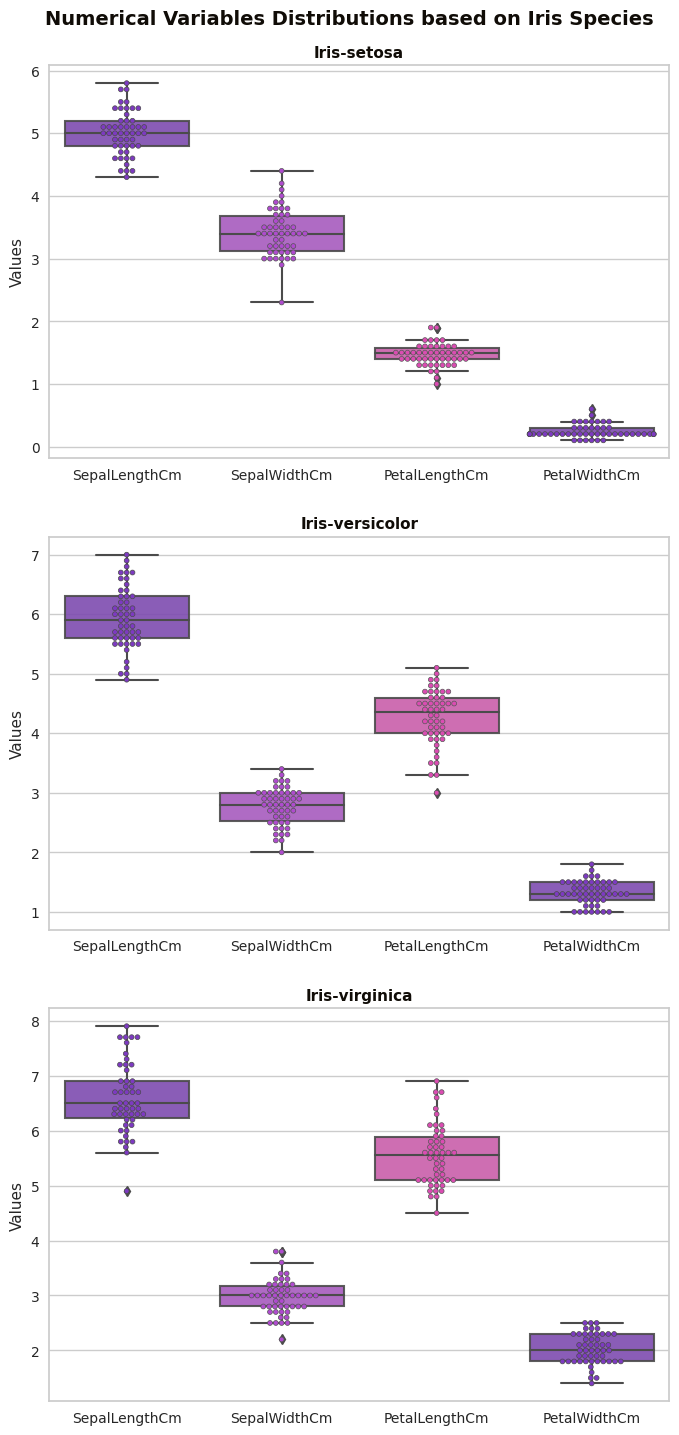

In [ ]:
sns.set_style('whitegrid')
dataset1 = dataset.xs(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], axis = 1)[dataset.Species == 'Iris-setosa']
dataset2 = dataset.xs(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], axis = 1)[dataset.Species == 'Iris-versicolor']
dataset3 = dataset.xs(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], axis = 1)[dataset.Species == 'Iris-virginica']
fig, axs = plt.subplots(3, 1, figsize = (8, 16))
fig.subplots_adjust(top = 0.945)
fig.suptitle('Numerical Variables Distributions based on Iris Species', fontweight = 'bold', fontsize = '14',
             fontfamily = 'sans-serif', color = black_grad[0])
p1 = sns.boxplot(x = 'variable', y = 'value', data = pd.melt(dataset1), ax = axs[0], palette = color_mix[1:4],
                 boxprops = dict(alpha = 0.9), linewidth = 1.5)
p1 = sns.swarmplot(x = 'variable', y = 'value', data = pd.melt(dataset1), ax = axs[0], palette = color_mix[1:4],
                   linewidth = 0.5, size = 3.5)
p1.set_title('Iris-setosa', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[0])
p1.set(xlabel = '', ylabel = 'Values')
p2 = sns.boxplot(x = 'variable', y = 'value', data = pd.melt(dataset2), ax = axs[1], palette = color_mix[1:4],
                 boxprops = dict(alpha = 0.9), linewidth = 1.5)
p2 = sns.swarmplot(x = 'variable', y = 'value', data = pd.melt(dataset2), ax = axs[1], palette = color_mix[1:4],
                   linewidth = 0.5, size = 3.5)
p2.set_title('Iris-versicolor', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[0])
p2.set(xlabel = '', ylabel = 'Values')
p3 = sns.boxplot(x = 'variable', y = 'value', data = pd.melt(dataset3), ax = axs[2], palette = color_mix[1:4],
                 boxprops = dict(alpha = 0.9), linewidth = 1.5)
p3 = sns.swarmplot(x = 'variable', y = 'value', data = pd.melt(dataset3), ax = axs[2], palette = color_mix[1:4],
                   linewidth = 0.5, size = 3.5)
p3.set_title('Iris-virginica', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[0])
p3.set(xlabel = '', ylabel = 'Values');

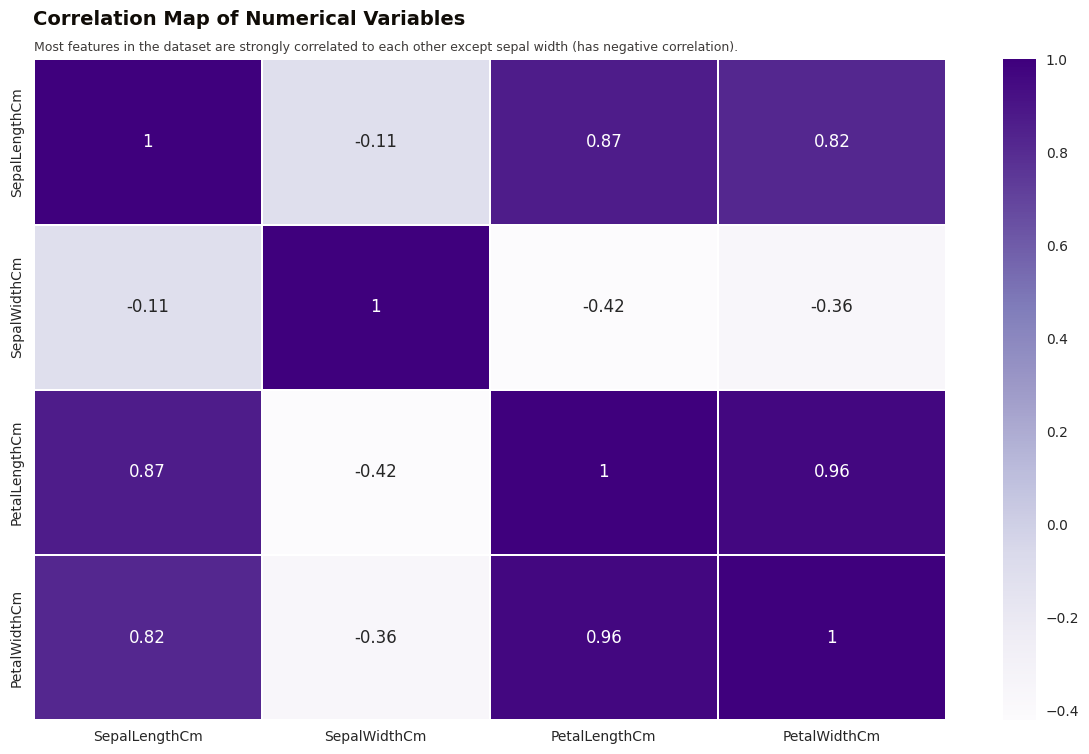

In [ ]:
dataset4 = dataset.xs(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], axis = 1)
plt.figure(figsize = (12, 8))
sns.heatmap(dataset4.corr(), annot = True, cmap = 'Purples', linewidths = 0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight = 'heavy', x = 0.034, y = 0.98, ha = 'left', fontsize = 14,
             fontfamily = 'sans-serif', color = black_grad[0])
plt.title('Most features in the dataset are strongly correlated to each other except sepal width (has negative correlation).',
          fontsize = 9, fontfamily = 'sans-serif', loc = 'left', color = black_grad[1])
plt.tight_layout(rect = [0, 0.04, 1, 1.01])

In [ ]:
dataset = dataset.drop('Id', axis = 1)

In [ ]:
dataset.head().style.background_gradient(cmap = 'RdPu').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5.100000,3.500000,1.400000,0.200000,Iris-setosa
4.900000,3.000000,1.400000,0.200000,Iris-setosa
4.700000,3.200000,1.300000,0.200000,Iris-setosa
4.600000,3.100000,1.500000,0.200000,Iris-setosa
5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
idx = [0, 1, 2]
print('\033[35m\033[1m'+'.: Target Variable After Encoding :.')
print('\033[0m\033[35m*' * 37)
pd.DataFrame({'Label': idx, 'Target': le.classes_}, columns = ['Label', 'Target']).style.background_gradient(cmap = 'Purples').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

.: Target Variable After Encoding :.
*************************************


Label,Target
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [ ]:
print('\033[35m\033[1m'+'.:. Train Test Info .:.')
print('\033[0m\033[35m*' * 25)
print('\033[35m\033[1m'+'>> Train Set')
print('\t\033[0m'+'.: Total data in train set:'+'\033[35m\033[1m', X_train.shape[0])
print('\t\033[0m'+'.: Total target data in train set:'+'\033[35m\033[1m', y_train.shape[0])
print('\t\033[0m'+'.: Total column in train set:'+'\033[35m\033[1m', X_train.shape[1])
print('\n\033[35m\033[1m'+'>> Test Set')
print('\t\033[0m'+'.: Total data in test set:'+'\033[35m\033[1m', X_test.shape[0])
print('\t\033[0m'+'.: Total target data in test set:'+'\033[35m\033[1m', y_test.shape[0])
print('\t\033[0m'+'.: Total column in test set:'+'\033[35m\033[1m', X_test.shape[1])

.:. Train Test Info .:.
*************************
>> Train Set
	.: Total data in train set: 120
	.: Total target data in train set: 120
	.: Total column in train set: 4

>> Test Set
	.: Total data in test set: 30
	.: Total target data in test set: 30
	.: Total column in test set: 4


In [ ]:
KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)

.:. K-Nearest Neighbour Accuracy: 100.00% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

.: Performance Evaluation
**************************


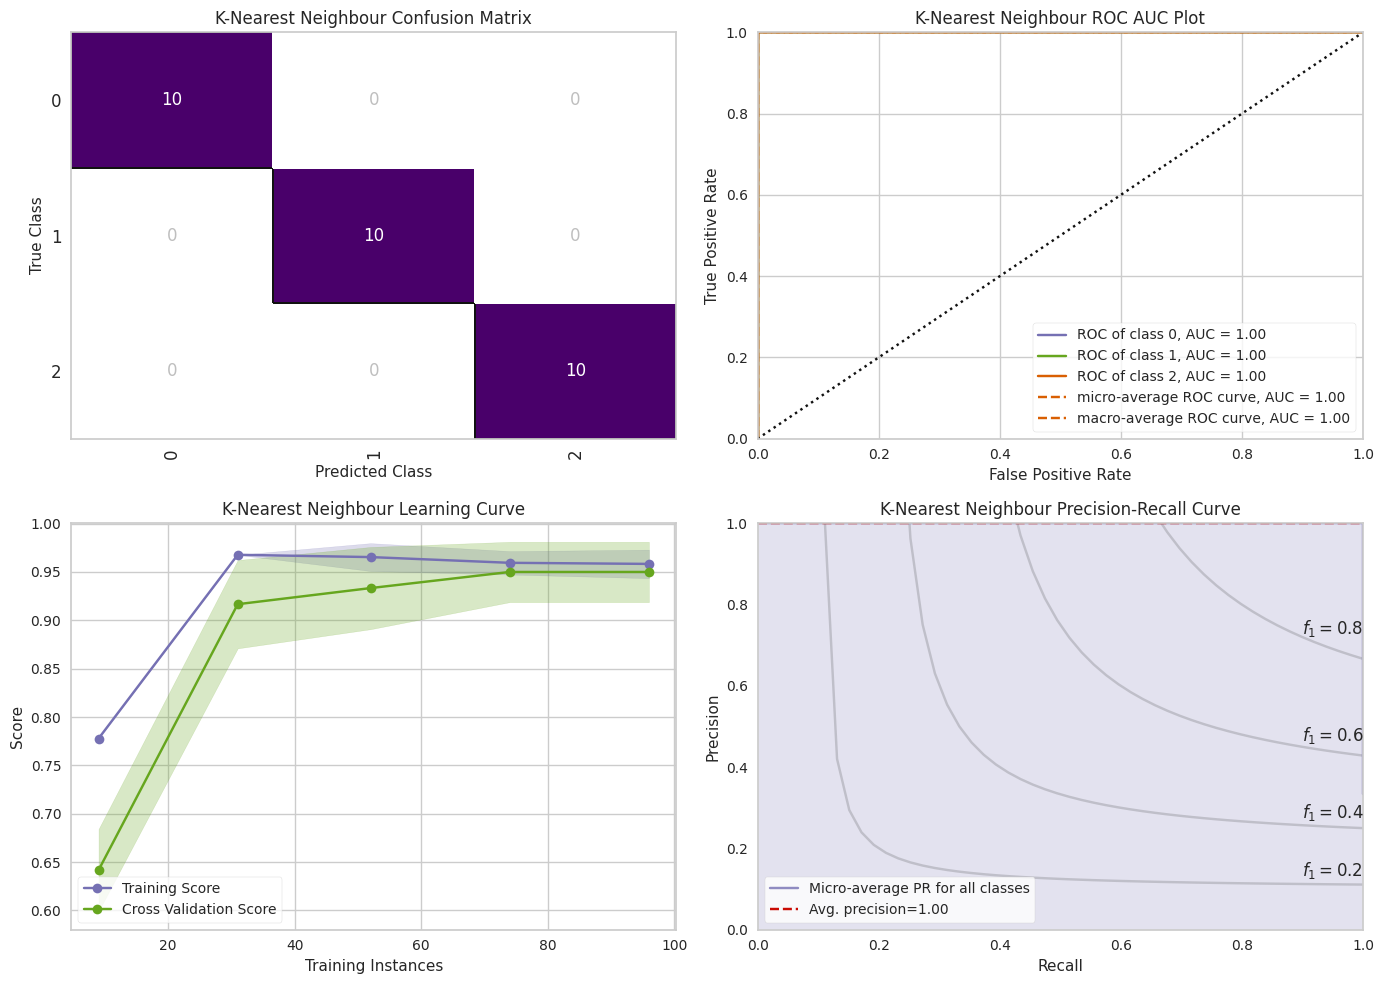

In [ ]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[35m\033[1m {:.2f}%'.format(KNNAcc*100)+' \033[0m.:.')
print('\033[35m\033[1m\n.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))
print('\033[35m\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (14, 10))
knnmatrix = ConfusionMatrix(KNNClassifier, ax = ax1, cmap = 'RdPu', title = 'K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train, y_train)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()
knnrocauc = ROCAUC(KNNClassifier, ax = ax2, title = 'K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(X_train, y_train)
knnrocauc.score(X_test, y_test)
knnrocauc.finalize()
knnlc = LearningCurve(KNNClassifier, ax = ax3, title = 'K-Nearest Neighbour Learning Curve')
knnlc.fit(X_train, y_train)
knnlc.finalize()
knncurve = PrecisionRecallCurve(KNNClassifier, ax = ax4, ap_score = True, iso_f1_curves = True,
                                title = 'K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(X_train, y_train)
knncurve.score(X_test, y_test)
knncurve.finalize()

plt.tight_layout();

In [ ]:
pred_knn = KNNClassifier.predict(X_test)
SepalLengthCm = X_test[:,0]
SepalWidthCm = X_test[:,1]
PetalLengthCm = X_test[:,2]
PetalWidthCm = X_test[:,3]
pred_knn= np.select([pred_knn == 0, pred_knn == 1, pred_knn == 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                    pred_knn)
output = pd.DataFrame({'SepalLengthCm': SepalLengthCm, 'SepalWidthCm': SepalWidthCm, 'PetalLengthCm': PetalLengthCm,
                       'PetalWidthCm': PetalWidthCm,
                       'Species': pred_knn})
output.head().style.background_gradient(cmap = 'Purples').hide_index().set_properties(**{'font-family': 'Segoe UI'})

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5.500000,3.500000,1.300000,0.200000,Iris-setosa
5.700000,2.800000,4.500000,1.300000,Iris-versicolor
5.100000,3.800000,1.900000,0.400000,Iris-setosa
6.100000,2.600000,5.600000,1.400000,Iris-virginica
5.100000,3.400000,1.500000,0.200000,Iris-setosa


In [41]:
output.to_csv('prediction_iris_species_caesarmario.csv', index = False)